{
  "cod": "200",
  "message": 0,
  "cnt": 40,
  "list": [
    {
      "dt": 1746975600,
      "main": {
        "temp": 30.56,
        "feels_like": 35.38,
        "temp_min": 29.7,
        "temp_max": 30.56,
        "pressure": 1006,
        "sea_level": 1006,
        "grnd_level": 1007,
        "humidity": 66,
        "temp_kf": 0.86
      },
      "weather": [
        {
          "id": 801,
          "main": "Clouds",
          "description": "few clouds",
          "icon": "02n"
        }
      ],
      "clouds": {
        "all": 13
      },
      "wind": {
        "speed": 4.04,
        "deg": 233,
        "gust": 4.37
      },
      "visibility": 10000,
      "pop": 0,
      "sys": {
        "pod": "n"
      },
      "dt_txt": "2025-05-11 15:00:00"
    },
    {
      "dt": 1746986400,
      "main": {
        "temp": 29.97,
        "feels_like": 34.97,
        "temp_min": 29.46,
        "temp_max": 29.97,
        "pressure": 1007,
        "sea_level": 1007,
        "grnd_level": 

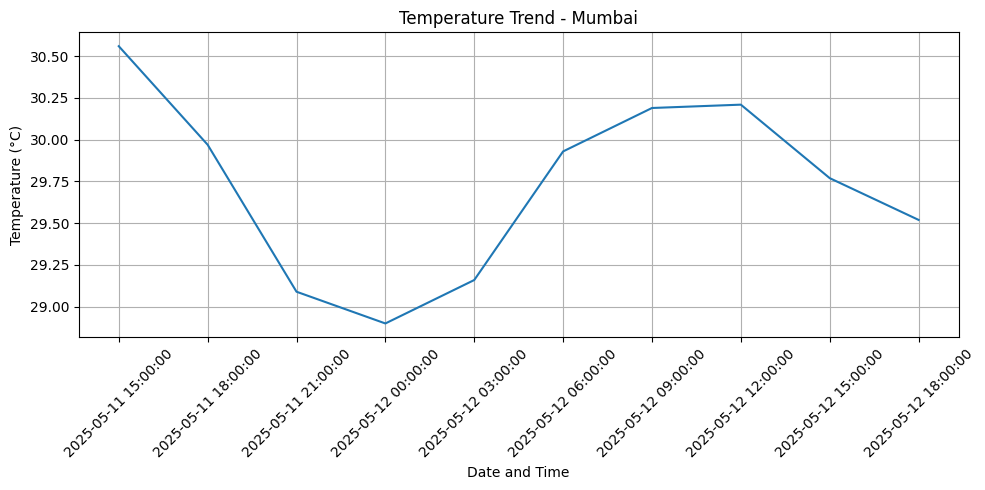

In [11]:
import requests
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import json

API_KEY='8d998c58576eabfadbd56a1f092c64a7'
city='Mumbai'
url=f"https://api.openweathermap.org/data/2.5/forecast?q=Mumbai&appid=8d998c58576eabfadbd56a1f092c64a7&units=metric"

response=requests.get(url)
data=response.json()
print(json.dumps(data, indent=2))

if response.status_code !=200:
    print(f"Error: API returned status code {response.status_code}")
elif 'list' not in data:
    print("Error: 'list' not found in API response.")
else:
    temps=[]
    times=[]
    
for forecast in data['list']:
    temps.append(forecast['main']['temp'])
    times.append(forecast['dt_txt'])

df= pd.DataFrame({
    'Time': times[:10],
    'Temperature': temps[:10]
})
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Time',y='Temperature')
plt.xticks(rotation=45)
plt.title(f"Temperature Trend - {city}")
plt.xlabel("Date and Time")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.grid(True)
plt.show()